
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_amarillo@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio A/B Testing Parametrico

⚠️ Recuerda en caso de que los resultados no sean suficientes una imagen vale mas que mil palabras 


#### Ejercicio 1:  Linea de montaje 

En una fabrica de componenetes textil se quiere comparar el tiempo de fabricacion de un determinado producto mediante tres métodos diferentes. Cada uno de los metodos se realizan en maquinas distintas. Se seleccionan aleatoriamente productos elaborados con cada uno de los métodos y se observa el tiempo de fabricación.  Si los tiempos de fabricacion son negativos significara que las maquinas estuvieron paradas esos minutos. 



1. ¿Se verifican los supuestos del modelo de análisis de la varianza?

2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?

3. La empresa valora que el tiempo de fabricación sea el menor posible. ¿Qué método cree que ofrece mejores resultados?

In [19]:
# Tratamiento de datos
# -----------------------------------------------------------------------
!pip install statsmodels
import pandas as pd
import numpy as np

# Calcular el tamaño muestral
# -----------------------------------------------------------------------
from statsmodels.stats.power import NormalIndPower
import statsmodels.stats.api as sms


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Importamos las funciones del archivo de soporte
# ------------------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_m6 as sa


# Otros recursos
# ------------------------------------------------------------------------------
import math

# Configuración de las gráficas
# ------------------------------------------------------------------------------
# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("dark")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en seaborn-v0_8-darkgrid. 
plt.style.use('dark_background')

from scipy.stats import ttest_ind

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Cargamos datos:
df_linea_montaje = pd.read_csv("../../Labs/Datos/linea_montaje.csv")
df_linea_montaje.head()

,minutos,metodo
0,4.166484,A
1,4.887466,A
2,0.727608,A
3,8.280542,A
4,1.413129,A


In [4]:
#Los supuestos del modelo de análisis de la varianza son: independencia, homocedasticidad, y normalidad. Comenzamos echando un ojo a los datos:
sa.exploracion_dataframe(df_linea_montaje,"metodo")

#POdemos Observar que C tiene la mayor media y desviación típica, y B tiene un mínimo negativo

El número de datos es 150 y el de columnas es 2

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
minutos,float64
metodo,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna METODO tiene las siguientes valore únicos:


,count
metodo,
A,50
B,50
C,50



 ..................... 

Los principales estadísticos de las columnas categóricas para el A son: 


,count,unique,top,freq
metodo,50,1,A,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el A son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.720512,2.102454,0.130465,3.312806,4.690071,6.005251,9.584416



 ..................... 

Los principales estadísticos de las columnas categóricas para el B son: 


,count,unique,top,freq
metodo,50,1,B,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el B son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.364523,2.085242,-0.818899,3.597334,4.506685,5.825817,7.668974



 ..................... 

Los principales estadísticos de las columnas categóricas para el C son: 


,count,unique,top,freq
metodo,50,1,C,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el C son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,5.600274,2.329937,1.334696,4.071824,5.064969,6.976655,12.059491


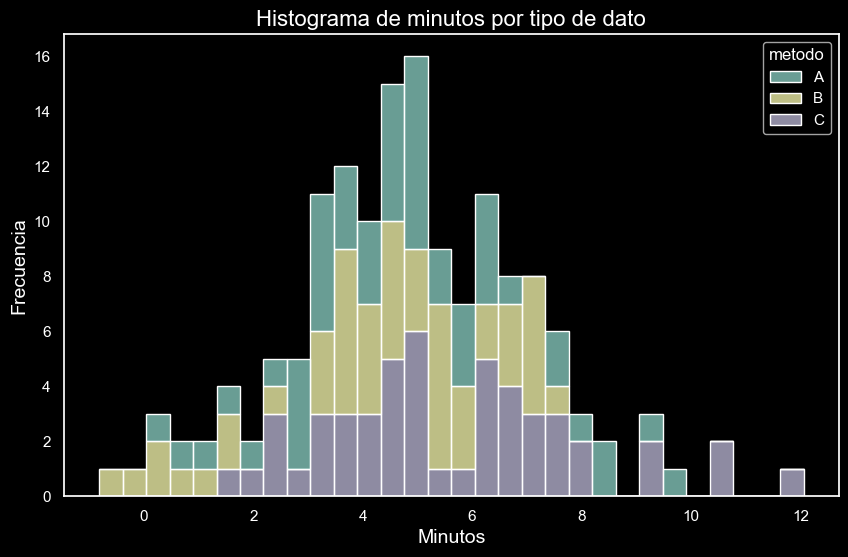

In [5]:
# Visualizamos:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_linea_montaje, x='minutos', hue='metodo', multiple='stack', kde=False, bins = 30)

plt.title('Histograma de minutos por tipo de dato', fontsize=16)
plt.xlabel('Minutos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.show()

# En principio ninguno parece normal. Hacemos la comprobación

In [6]:
#Eliminamos los datos negativos y comprobamos
df_linea_montaje.drop(df_linea_montaje[df_linea_montaje["minutos"] < 0].index, inplace=True)
df_linea_montaje[df_linea_montaje["minutos"] < 0]

,minutos,metodo


In [7]:
#Damos por hecho que los datos son independientes. Como hay más de 30 datos usaremos K-S para testear la normalidad de cada conjunto.
from scipy.stats import kstest
# Iterar sobre los grupos (por ejemplo, por 'tipo_dato')
for tipo in df_linea_montaje['metodo'].unique():
    # Filtrar el DataFrame para cada grupo
    grupo = df_linea_montaje[df_linea_montaje['metodo'] == tipo]
    
    # Calcular la media y la desviación estándar del grupo
    media = grupo['minutos'].mean()
    desviacion = grupo['minutos'].std()
    
    # Aplicar el test de Kolmogorov-Smirnov para la distribución normal
    stat, p_value = kstest(grupo['minutos'], 'norm', args=(media, desviacion))
    
    # Mostrar los resultados para cada grupo
    print(f'Grupo: {tipo}')
    print(f'Estadístico KS: {stat}')
    print(f'Valor p: {p_value}')
    
    # Interpretación del valor p
    if p_value > 0.05:
        print("No se puede rechazar la hipótesis nula: los datos siguen una distribución normal")
    else:
        print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal")
    
    print('---')

Grupo: A
Estadístico KS: 0.08510025236028507
Valor p: 0.831915919566997
No se puede rechazar la hipótesis nula: los datos siguen una distribución normal
---
Grupo: B
Estadístico KS: 0.08919864422432602
Valor p: 0.8071977044427
No se puede rechazar la hipótesis nula: los datos siguen una distribución normal
---
Grupo: C
Estadístico KS: 0.10224330731103809
Valor p: 0.6354526500316278
No se puede rechazar la hipótesis nula: los datos siguen una distribución normal
---


In [8]:
from scipy.stats import levene
# Inicializamos un diccionario para almacenar los resultados
resultados_levene = {}

# Iterar sobre los grupos (por ejemplo, por 'tipo_dato')
for tipo in df_linea_montaje['metodo'].unique():
    # Filtrar el DataFrame para cada grupo
    grupo = df_linea_montaje[df_linea_montaje['metodo'] == tipo]
    
    # Almacenamos los datos de cada grupo en una lista para aplicar el test de Levene
    resultados_levene[tipo] = grupo['minutos'].values

# Aplicamos el test de Levene para comparar las varianzas entre los grupos
stat, p_value = levene(*resultados_levene.values())

# Mostrar los resultados
print(f'Estadístico Levene: {stat}')
print(f'Valor p: {p_value}')

# Interpretación del valor p
if p_value > 0.05:
    print("No se puede rechazar la hipótesis nula: las varianzas son homogéneas entre los grupos")
else:
    print("Se rechaza la hipótesis nula: las varianzas no son homogéneas entre los grupos")

Estadístico Levene: 1.0626920726615094
Valor p: 0.34819974732699716
No se puede rechazar la hipótesis nula: las varianzas son homogéneas entre los grupos


In [9]:
#Observamos que los datos son normales y homocedásticos, vamos a usar ANOVA para ver si hay diferencias 
from scipy.stats import f_oneway
# Filtramos los datos por cada grupo
grupos = [df_linea_montaje[df_linea_montaje['metodo'] == tipo]['minutos'] for tipo in df_linea_montaje['metodo'].unique()]

# Aplicamos el test de ANOVA de una vía
stat, p_value = f_oneway(*grupos)

# Mostrar los resultados
print(f'Estadístico ANOVA: {stat}')
print(f'Valor p: {p_value}')

# Interpretación del valor p
if p_value > 0.05:
    print("No se puede rechazar la hipótesis nula: no hay diferencias significativas entre los grupos")
else:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos")

Estadístico ANOVA: 3.451228961333596
Valor p: 0.034334606507256296
Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos


In [10]:
# El método B tiene menor tiempo medio, por eso es más aconsejable

#### Ejercicio 2: Densidad de Fluidos 


La convección es un mecanismo fundamental de transferencia de calor en fluidos, que ocurre debido a las variaciones en la densidad provocadas por diferencias de temperatura. Este fenómeno se manifiesta cuando las porciones del fluido que se calientan, al volverse menos densas, ascienden hacia regiones de menor temperatura, mientras que las porciones más frías, al ser más densas, descienden hacia las zonas donde la temperatura es más alta. Este movimiento continuo da lugar a las llamadas corrientes de convección, las cuales desempeñan un papel crucial en la distribución homogénea de la temperatura dentro del fluido, promoviendo un equilibrio térmico.

En este contexto, se ha diseñado y ejecutado un experimento con el propósito de investigar cómo se ve afectada la densidad de un fluido cuando se incrementa la temperatura en una región específica del sistema; por tanto se asegura la independencia y aleatoriedad del mismo. El objetivo del experimento es comprender en detalle las modificaciones en la densidad que resultan de este aumento térmico y cómo estas afectan el comportamiento global del fluido.


1. Analiza las suposiciones del modelo: ¿Se cumplen las condiciones de homocedasticidad, independencia y normalidad?
2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?
3. ¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?

In [11]:
#Importamos datos
df_densidad = pd.read_csv("../../Labs/Datos/densidad_fluidos.csv")

In [12]:
df_densidad["temperatura"].unique()

array([100, 125, 150, 175])

In [13]:
sa.exploracion_dataframe(df_densidad,"temperatura")

El número de datos es 400 y el de columnas es 2

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
temperatura,int64
densidad,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 

 ..................... 

Los principales estadísticos de las columnas numéricas para 100 son: 


,count,mean,std,min,25%,50%,75%,max
temperatura,100.0,100.00000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
densidad,100.0,21.72941,0.092615,21.472837,21.678719,21.727053,21.781399,21.928896



 ..................... 

Los principales estadísticos de las columnas numéricas para 125 son: 


,count,mean,std,min,25%,50%,75%,max
temperatura,100.0,125.000000,0.000000,125.000000,125.000000,125.000000,125.000000,125.000000
densidad,100.0,21.532402,0.102713,21.323342,21.443228,21.539059,21.587963,21.822971



 ..................... 

Los principales estadísticos de las columnas numéricas para 150 son: 


,count,mean,std,min,25%,50%,75%,max
temperatura,100.0,150.000000,0.000000,150.000000,150.000000,150.000000,150.000000,150.000000
densidad,100.0,21.766618,0.110576,21.429454,21.693158,21.769963,21.831839,22.152903



 ..................... 

Los principales estadísticos de las columnas numéricas para 175 son: 


,count,mean,std,min,25%,50%,75%,max
temperatura,100.0,175.000000,0.00000,175.000000,175.000000,175.000000,175.000000,175.000000
densidad,100.0,21.903682,0.11322,21.618009,21.817386,21.896423,21.977595,22.170432


In [14]:
#Podemos ver que sí se cumplen los supuestos de homocedasticidad y normalidad. Damos por hecho que se cumple el de independencia.
sa.parametrico(df_densidad,"temperatura","densidad")

El subgrupo tiene 100 elementos, usamos K-S
Grupo: 100
Estadístico KS: 0.051776473605968876
Valor p: 0.9386471491697437
No se puede rechazar la hipótesis nula: los datos siguen una distribución normal
---
El subgrupo tiene 100 elementos, usamos K-S
Grupo: 125
Estadístico KS: 0.07210369396849026
Valor p: 0.6491556422553408
No se puede rechazar la hipótesis nula: los datos siguen una distribución normal
---
El subgrupo tiene 100 elementos, usamos K-S
Grupo: 150
Estadístico KS: 0.05555454410249083
Valor p: 0.9000738973191298
No se puede rechazar la hipótesis nula: los datos siguen una distribución normal
---
El subgrupo tiene 100 elementos, usamos K-S
Grupo: 175
Estadístico KS: 0.052646760818004956
Valor p: 0.9306618656035937
No se puede rechazar la hipótesis nula: los datos siguen una distribución normal
---
Resultados del Test de Bartlett:
Estadístico de Bartlett: 4.680218828816711
Valor p: 0.19676755827086465
No se puede rechazar la hipótesis nula: las varianzas son homogéneas
El conju

In [ ]:
""" H0: avg(grupo 1) = avg(grupo2)
    H1: avg (grupo 1) != avg(Grupo2)"""
#Encontramos que sí existen diferencias entre grupos
sa.diferencias_anova(df_densidad,"temperatura","densidad")

Estadístico ANOVA: 212.84277610615817
Valor p: 3.327798065119595e-82
Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos


False

In [16]:
sa.diferencias_por_grupos(df_densidad,"temperatura","densidad")

Comparando los grupos '100' y '125':
  Estadístico t: 14.244657868926197
  Valor p: 4.5600773354727755e-32
  Rechazamos la hipótesis nula: existe una diferencia significativa entre los grupos.
---
Comparando los grupos '100' y '150':
  Estadístico t: -2.5796587920932605
  Valor p: 0.010636814250155517
  Rechazamos la hipótesis nula: existe una diferencia significativa entre los grupos.
---
Comparando los grupos '100' y '175':
  Estadístico t: -11.914019096848874
  Valor p: 8.112615200640155e-25
  Rechazamos la hipótesis nula: existe una diferencia significativa entre los grupos.
---
Comparando los grupos '125' y '150':
  Estadístico t: -15.519160649454719
  Valor p: 5.2576611974815736e-36
  Rechazamos la hipótesis nula: existe una diferencia significativa entre los grupos.
---
Comparando los grupos '125' y '175':
  Estadístico t: -24.28750520576178
  Valor p: 4.9180976635277066e-61
  Rechazamos la hipótesis nula: existe una diferencia significativa entre los grupos.
---
Comparando los 

In [ ]:

#H0 => avg(grupo_bajo)-avg(grupo_alto) <= 0 (LA MEDIA DE DENSIDAD DE FLUIDO DEL GRUPO GRANDE ES MAYOR QUE LA DEL GRUPO BAJO)
#H1 => avg(grupo_bajo)-avg(grupo_alto) > 0 (LA MEDIA DE DENSIDAD DEL FLUIDO DEL GRUPO GRANDE ES MENOR QUE LA DEL GRUPO BAJO)


# Filtrar las temperaturas de 100 y 125, y de 150 y 175
grupo_bajo = df_densidad[df_densidad["temperatura"].isin([100, 125])]
grupo_alto = df_densidad[df_densidad["temperatura"].isin([150, 175])]

# Realizar el test t-Student
t_stat, p_value = ttest_ind(grupo_bajo["densidad"], grupo_alto["densidad"], equal_var=True)

# Imprimir los resultados del test
print("Comparando las temperaturas 100 y 125 con 150 y 175:")
print(f"  Estadístico t: {t_stat}")
print(f"  Valor p: {p_value}")


if p_value < 0.05:
    print("  Rechazamos la hipótesis nula: las temperaturas 100 y 125 provocan una menor densidad en promedio que 150 y 175.")
else:
    print("  No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que las temperaturas 100 y 125 provocan una menor densidad.")
print('---')


Comparando las temperaturas 100 y 125 con 150 y 175:
  Estadístico t: -15.129677894969593
  Valor p: 3.563849634924047e-41
  Rechazamos la hipótesis nula: las temperaturas 100 y 125 provocan una menor densidad en promedio que 150 y 175.
---
